# Predicting Heart Disease 

## Taking following Steps:
1. Problem Statement
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experementation

## 1. Problem Statement
Given clinical parameters about patient, to predict the given patient is affected with heart-disease or not heart-disease ?

## 2. Data

The Data of Cleveland database is taken from the Kaggle https://www.kaggle.com/ronitf/heart-disease-uci


## 3. Evaluation

> Tf we can reach the 95% accuracy of the ML Model then we have a proof of the given patient have Heart-disease or not.

## 4. Feature
Diffent featues with some information

**Create data dictionary**
1. age  -> in years
2. sex  -> (1 = male; 0 = female)
3. cp   -> chest pain type
4. trestbps -> resting blood pressure (in mm Hg on admission to the hospital)
5. chol - > serum cholestoral in mg/dl
6. fbs -> (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. restecg -> resting electrocardiographic results
8. thalach -> maximum heart rate achieved
9. exang -> exercise induced angina (1 = yes; 0 = no)
10. oldpeak -> ST depression induced by exercise relative to rest
11. slope -> the slope of the peak exercise ST segment
12. ca -> number of major vessels (0-3) colored by flourosopy
13. thal -> 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target -> 1 or 0

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0 : Typical angina: chest pain related decrease blood supply to the heart
    * 1 : Atypical angina: chest pain not related to heart
    * 2 : Non-anginal pain: typically esophageal spasms (non heart related)
    * 3 : Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)


### Preparing the tools 

In [8]:
# Importing all the library For EDA (Exploratory Data Analysis) and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
#plots are appearn insinde the notebook

In [5]:
# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Model evalution
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [11]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA (Exploratory Data Analysis)
 find out the more about data and become the subject matter export
 1. what questions are you trying to solve?
 2. what kind of data do we have and how do we treat diffent types?
 3. what's missing from the data and how to deal with it?
 4. where are outliers and why should we care about them?
 5. how can we add,remove and change feature to get more out of your data?

In [16]:
# checking the how many classes of target do we have?
heart_disease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

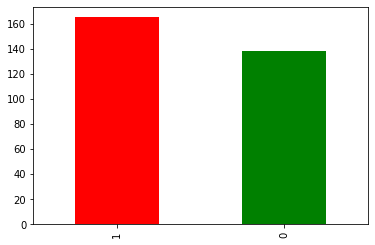

In [20]:
heart_disease.target.value_counts().plot(kind='bar',color=['r','g']);

Hence we have balance data

In [21]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
# Checking missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
# finding the features dependency using correlation
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


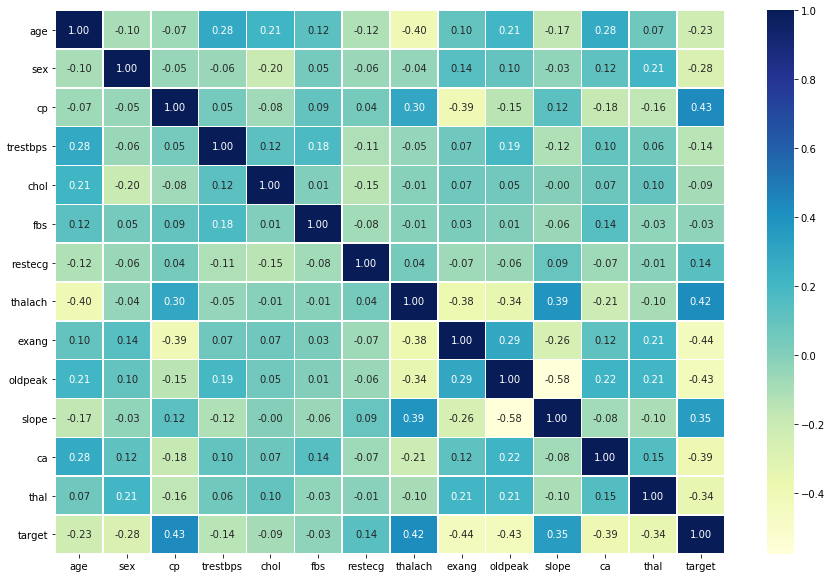

In [26]:
# let's do correlation matrix much prettier (using heatmap graph)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(heart_disease.corr(),
                annot = True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## 5. Modelling

In [27]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# splitting the data into X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease.target

In [29]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [33]:
X.shape,y.shape

((303, 13), (303,))

In [32]:
# splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle = True,
                                                    random_state=2020)

In [34]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3


In [35]:
y_train

57     1
250    0
251    0
102    1
214    0
      ..
131    1
125    1
91     1
195    0
118    1
Name: target, Length: 242, dtype: int64

## applying ml models
* Logistic Regression
* K-Nearest Neighbor Classifier
* Random forest Classifier

In [63]:
# Putting models into dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest Classifier':RandomForestClassifier()}

# Create a function to fit and store the score 

def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''
    fit and evaluates given models
    models : a dict of the different ML models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : traing labels
    y_test : testing labels 
    '''
    
    # set random seed
    np.random.seed(2020)
    
    # make a empty dict to store the score of the given models
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # fit the model
        model.fit(X_train,y_train)
        # store the model score
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

In [64]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7213114754098361,
 'Random Forest Classifier': 0.7704918032786885}

## Model Comparison

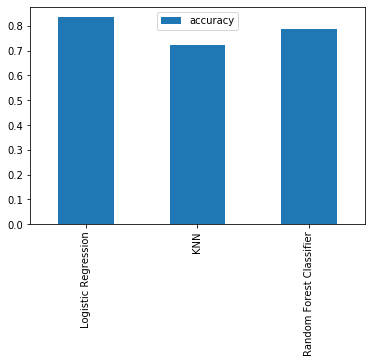

In [43]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

We have a baseline ML model.....
But we know that not always a baseline should be best model

Let's check the following:
* Hyperparameter Tunning
* Feature important
* Confusion matrix
* Cross-validation
* Precision
* F1 score
* Recall
* Classification report
* ROC curve
* AUC score

## Hyperparameter Tunning (By Hand)

In [46]:
# tune Knn

train_scores = []
test_scores = []

# list of diffrent n_neighbores to tune
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    # seting the n_neighbore
    knn.set_params(n_neighbors=i)
    # fit the model
    knn.fit(X_train,y_train)
    # append the train score
    train_scores.append(knn.score(X_train,y_train))
    # append the test score
    test_scores.append(knn.score(X_test,y_test))

In [47]:
train_scores

[1.0,
 0.78099173553719,
 0.78099173553719,
 0.7355371900826446,
 0.743801652892562,
 0.7479338842975206,
 0.7148760330578512,
 0.7107438016528925,
 0.7024793388429752,
 0.6776859504132231,
 0.6983471074380165,
 0.6900826446280992,
 0.6900826446280992,
 0.6859504132231405,
 0.7024793388429752,
 0.7024793388429752,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6900826446280992]

In [48]:
test_scores

[0.5409836065573771,
 0.5245901639344263,
 0.639344262295082,
 0.7049180327868853,
 0.7213114754098361,
 0.6885245901639344,
 0.7377049180327869,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853]

Maximum Knn Model score on test set : 73.77%


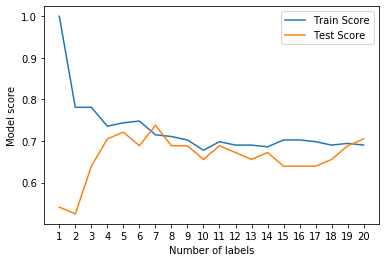

In [51]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of labels')
plt.ylabel('Model score') 
plt.legend()

print(f'Maximum Knn Model score on test set : {max(test_scores)*100:.2f}%')

## Hyperparameter Tuning with RandomizedSearchCV
* Logistics Regression
* Random Forest Classifier

In [57]:
# create a hyperparameter grid for logisticRegression 

log_reg_grid = {'C' : np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# create a hyperparameter grid for RandomForest
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [53]:
# tune logisticRegression
np.random.seed(2020)

# setup randomized hyperparameter to logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit the RandomizedSearchCV for logistic Regression model
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [54]:
# best parameter for logistic regression using RandomSearchCV

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [55]:
# best score
rs_log_reg.score(X_test,y_test)

0.8032786885245902

In [58]:
# tune RandomForest
np.random.seed(2020)

# setup randomized hyperparameter to RandomForest
rs_reg = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit the RandomizedSearchCV for RandomForest model
rs_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [59]:
# best parameter for RandomForest using RandomSearchCV

rs_reg.best_params_

{'n_estimators': 710,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [65]:
# best score
rs_reg.score(X_test,y_test)

0.8360655737704918

In [62]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7213114754098361,
 'Random Forest Classifier': 0.7868852459016393}

In [67]:
np.random.seed(2020)
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
print(log_model.score(X_test,y_test))

0.8360655737704918


C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
log_model.C,log_model.solver

(1.0, 'lbfgs')

## Hyperparameter tuning with GridSearchCV
Since the LogisticsRegression Baseline and RandomForest are the best model so far....

In [82]:
# different parameter for logistic regression
log_reg_grid = {'C':np.logspace(0 , 4,10),
                 'solver':['lbfgs','liblinear']}

# setup gridsearch for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True
                            )
# fit the gridsearch
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pleas

C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

In [83]:
# best parameter for GridSearchCV
gs_log_reg.best_params_

{'C': 1.0, 'solver': 'lbfgs'}

In [88]:
gs_log_reg.score(X_test,y_test)

0.8360655737704918

In [89]:
# create a hyperparameter grid for RandomForest
np.random.seed(2020)

rf_grid = {'n_estimators' : np.arange(600, 1000, 100),
           'max_depth' : [None, 3, 10],
           'min_samples_split' : np.arange(2, 5),
           'min_samples_leaf': np.arange(2, 5)}

# setup gridsearch for RandomForest
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          n_jobs=3,
                          verbose=2)

# fit the gridsearch
gs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  3.7min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  7.3min
[Parallel(n_jobs=3)]: Done 540 out of 540 | elapsed: 10.6min finished


In [90]:
# best parameter for GridSearchCV for RandomForest
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 700}

In [91]:
# best score for GridSearchCV for RandomForest
gs_rf.score(X_test,y_test)

0.819672131147541

In [92]:
np.random.seed(2020)

'''best parameter  {'n_estimators': 710,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 3}'''

rf = RandomForestClassifier(n_estimators=710,
                            min_samples_split=2,
                            min_samples_leaf=3,
                            max_depth=3)

rf.fit(X_train,y_train)

rf.score(X_test,y_test)

0.819672131147541

In [93]:
# Hence the baseline model LogisticRegression is the best model regrading accuracy
np.random.seed(2020)

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

log_reg.score(X_test,y_test)

C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8360655737704918

## Evaluating our tunned model beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* F1 Score
* Recall
* Best if we can use cross_validation 

In [94]:
# make predictions with tunned model
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [95]:
np.array(y_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

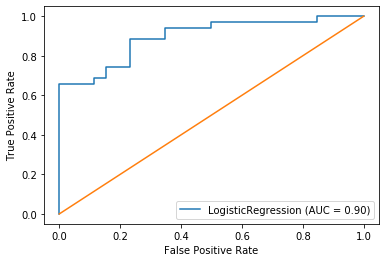

In [102]:
# plot ROC curve and calculate AUC metrics
plot_roc_curve(log_reg, X_test, y_test)
plt.plot([0,1],[0,1]);

In [104]:
# confusion metrix
confusion_matrix(y_test,y_pred)

array([[20,  6],
       [ 4, 31]], dtype=int64)

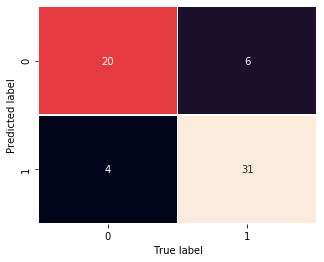

In [118]:
# confusion metrix ploting
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                annot = True,
                linewidths=0.5,
                cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [120]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.84      0.89      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



above evaluations are calculated only on one split
Hence we use cross validation

## Calculating evaluation matrix using cross validation 

In [124]:
# cross_val_score using accuracy
cv_acc = cross_val_score(log_reg,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

array([0.83606557, 0.86885246, 0.85245902, 0.85      , 0.75      ])

In [125]:
# cross val accuracy
cv_acc = np.mean(cv_acc)
cv_acc

0.8314754098360655

In [126]:
# cross_val_score using precision
cv_precision = cross_val_score(log_reg,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision

C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

array([0.79487179, 0.90322581, 0.85294118, 0.83333333, 0.725     ])

In [127]:
# cross val precision
cv_precision = np.mean(cv_precision)
cv_precision

0.8218744222254658

In [128]:
# cross_val_score using recall
cv_recall = cross_val_score(log_reg,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall

C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

array([0.93939394, 0.84848485, 0.87878788, 0.90909091, 0.87878788])

In [129]:
# cross_val_score using recall

cv_recall = np.mean(cv_recall)
cv_recall

0.890909090909091

In [131]:
# cross_val_score using f1 score
cv_f1_score = cross_val_score(log_reg,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1_score

C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VIJAY PRATAP PANDEY\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

array([0.86111111, 0.875     , 0.86567164, 0.86956522, 0.79452055])

In [132]:
# cross_val_score using f1 score

cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8531737036477332

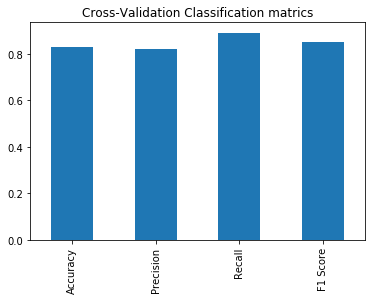

In [136]:
# Visualization of cross validation results
cross_val_score = pd.DataFrame({'Accuracy' : cv_acc,
                                'Precision' : cv_precision,
                                'Recall' : cv_recall,
                                'F1 Score' : cv_f1_score},
                                index = [0])

cross_val_score.T.plot.bar(title='Cross-Validation Classification matrics',
                           legend = False);

## Feature Importance

which feaures contributed most in to the model output.

finding important features of models are different for each model

In [137]:
# finding important features for LogisticsRegression Model

# check coef
log_reg.coef_

array([[ 0.01633191, -1.38694998,  0.73528256, -0.01524688, -0.00269102,
        -0.04061962,  0.27714935,  0.02811089, -0.75483508, -0.47511192,
         0.62030211, -0.949498  , -0.81991023]])

In [138]:
# match coffeicient of parameter with the columns

feature_dict = dict(zip(heart_disease.columns,log_reg.coef_[0]))
feature_dict

{'age': 0.016331912243102473,
 'sex': -1.3869499769913303,
 'cp': 0.735282560089053,
 'trestbps': -0.015246883561914552,
 'chol': -0.002691016286631925,
 'fbs': -0.04061962219278581,
 'restecg': 0.2771493526068141,
 'thalach': 0.02811088942546276,
 'exang': -0.7548350821947644,
 'oldpeak': -0.4751119221708551,
 'slope': 0.6203021104579605,
 'ca': -0.9494979995794705,
 'thal': -0.8199102290164823}

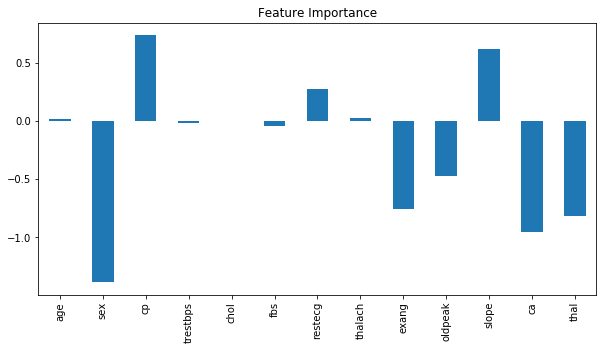

In [158]:
# visualize the feature importance
feature_df = pd.DataFrame(feature_dict,
                          index=[0])
fig,ax = plt.subplots(figsize=(10,5))
feature_df.T.plot.bar(title='Feature Importance',legend=False,ax=ax);

## Experimentation

* Could we collect more data ?
* Could we try better model Like XGBoost ? 
* Could we improve the current model more ?

In [161]:
# Export the model
import pickle
pickle.dump(log_reg,open('heart-disease-model.pkl','wb'))